<a href="https://colab.research.google.com/github/bereml/iap/blob/master/libretas/2d_audio_mezcla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mezcla de audios

Curso: [Introducción al Aprendizaje Profundo](http://turing.iimas.unam.mx/~ricardoml/course/iap/). Profesores: [Bere](https://turing.iimas.unam.mx/~bereml/) y [Ricardo](https://turing.iimas.unam.mx/~ricardoml/) Montalvo Lezama.

---
---

In [1]:
from os.path import join

import librosa
import librosa.display
import IPython as ip
import torchaudio

/home/richardt/.miniconda3/envs/iap/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


### Descargamos datos

In [2]:
base_dir = '../datos/LibriSpeech'
! mkdir -p {base_dir}
! ls -R {base_dir} | head -10

../datos/LibriSpeech:
LibriSpeech
test-clean.tar.gz

../datos/LibriSpeech/LibriSpeech:
BOOKS.TXT
CHAPTERS.TXT
LICENSE.TXT
README.TXT
SPEAKERS.TXT
ls: write error: Broken pipe


In [3]:
_ = torchaudio.datasets.LIBRISPEECH(base_dir, url='test-clean', download=True)

In [4]:
! ls -R {base_dir} | head -10

../datos/LibriSpeech:
LibriSpeech
test-clean.tar.gz

../datos/LibriSpeech/LibriSpeech:
BOOKS.TXT
CHAPTERS.TXT
LICENSE.TXT
README.TXT
SPEAKERS.TXT
ls: write error: Broken pipe


### Audio 1

Duración (muestras): 108156
Frecuencia de muestreo: 22050


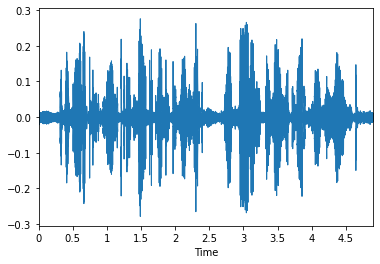

In [5]:
# cargamos el audio
path1 = join(base_dir, 'LibriSpeech/test-clean/61/70968/61-70968-0000.flac')
y1, sample_rate1 = librosa.load(path1, mono=True)

print(f'Duración (muestras): {y1.shape[0]}')
print(f'Frecuencia de muestreo: {sample_rate1}')

# graficámos la forma de onda
librosa.display.waveplot(y1, sr=sample_rate1)

# reproducimos
ip.display.Audio(y1, rate=sample_rate1)

### Audio 2

Duración (muestras): 90516
Frecuencia de muestreo: 22050


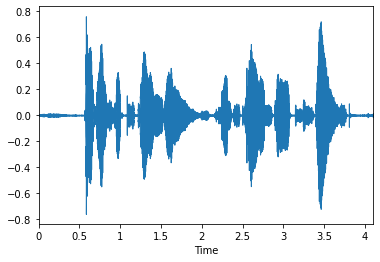

In [6]:
# cargamos el audio
path2 = join(base_dir, 'LibriSpeech/test-clean/237/134493/237-134493-0000.flac')
y2, sample_rate2 = librosa.load(path2, mono=True)

print(f'Duración (muestras): {y2.shape[0]}')
print(f'Frecuencia de muestreo: {sample_rate2}')

# graficámos la forma de onda
librosa.display.waveplot(y2, sr=sample_rate2)

# reproducimos
ip.display.Audio(y2, rate=sample_rate2)

### Mezcla

Duración (muestras): 90516
Frecuencia de muestreo: 22050


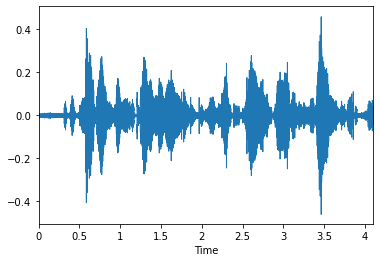

In [7]:
# recortamos a la duración mínima
max_samples = min(y1.shape[0], y2.shape[0])
y1 = y1[:max_samples]
y2 = y2[:max_samples]

# sumamos las amplitudes en las formas de onda y dividimos entre 2
y3 = (y1 + y2) / 2
# lo mismo con la frecuencia de mestreo
sample_rate3 = (sample_rate1 + sample_rate2) // 2

print(f'Duración (muestras): {y3.shape[0]}')
print(f'Frecuencia de muestreo: {sample_rate3}')

# graficámos la forma de onda
librosa.display.waveplot(y3, sr=sample_rate3)

# reproducimos
ip.display.Audio(y3, rate=sample_rate3)